## Bayesian 


#Discrete Probability Distribution using Bayesian, which uses subjective probability which describes beliefs about unknown quantities.And the method used is through probability distribution. a Spinner is used as a example which is divided into sev eral regions and opt for various outcomes.
#Package Used- "TeachBayes" (available on CRAN).The Special functions for Bayes'rule are-  Learning baout a proportion and a mean and comparing two proportions.Subjective probabiltiy means the probability is used to describe beliefs about unknown quantities. This is done through probability distributions.

Warning message:
"package 'TeachBayes' was built under R version 3.4.3"Loading required package: LearnBayes
Loading required package: ggplot2
Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.4.3"Loading required package: dplyr

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: shiny
Warning message:
"package 'shiny' was built under R version 3.4.3"

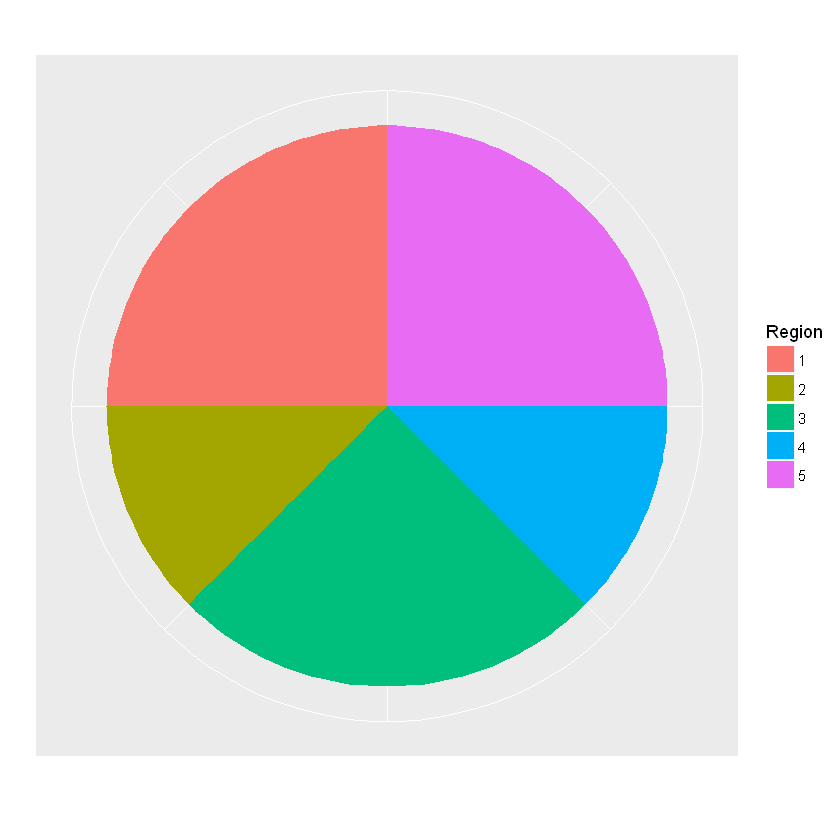

In [6]:
library(TeachBayes)
# construct the spinner by specifying the areas of the spinner regions
areas <- c(2,1,2,1,2)
spinner_plot(areas)


This indicates the area of region 1,3 and 5 are twice that of region 2 and 4

In [7]:
#Construct probability distribution
df <- data.frame(Region =  1:5, areas, Probability = areas/sum(areas))
df

Region,areas,Probability
1,2,0.250
2,1,0.125
3,2,0.250
4,1,0.125
5,2,0.250


In [8]:
#Numerical scale for probabilities
# To interpret the probabilities under a scale from 0 to 1 where 0 means impossible and 1 means certain
sum(df$Probability)

[1] 1

sum of the probability is 1 and the probability of regions 1,3 and 5 are more likely to spin, since their probabilities are higher and regions 2 and 4 are less likely to spin, since their probabilities are lower.

spins
  1   2   3   4   5 
255 115 266 115 249 

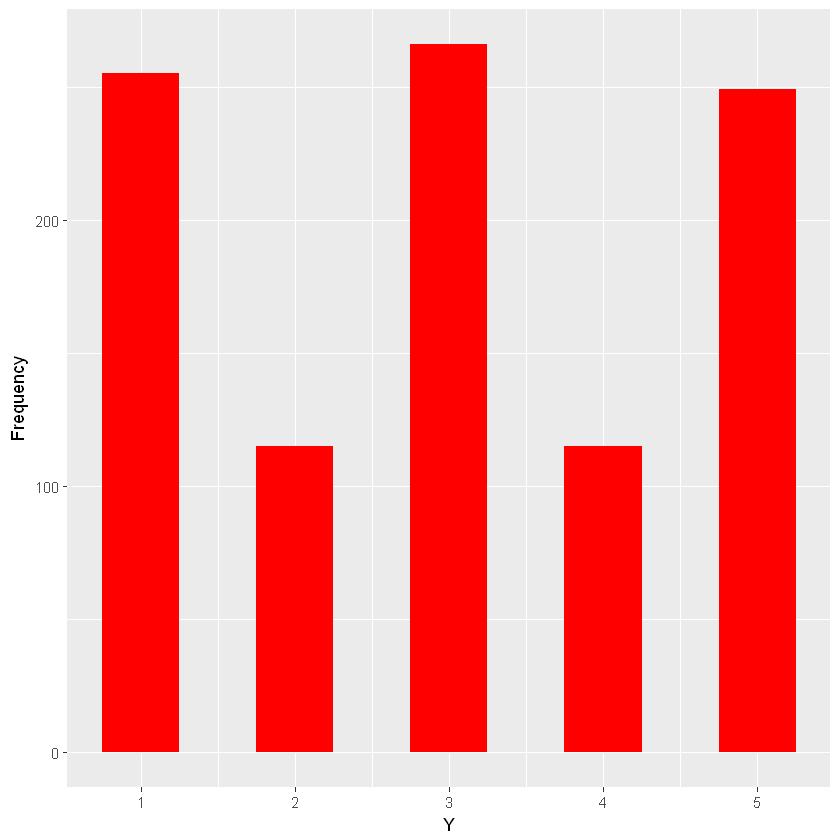

In [9]:
#Simulating spinner data
spins <- spinner_data(areas)
bar_plot(spins)
table(spins)

Simulation helps to learn about the probabilities, even in situations where the exact probabilities are not known.

### Bayes'rule
It helps in learning about the unknown quantity of the data.Identify list of possible models and assign probabilities that reflect the belief about the relative possibility of the models. Collect data and find likelihoods, that is the chance of getting the data for each model. 

In [10]:
bayes_df <- data.frame(Model = paste("Spinner",c("A","B","C","D")))
bayes_df

Model
Spinner A
Spinner B
Spinner C
Spinner D


Probabilities are assigned to each model that shows the opinion about the likelihood for these spinners.

In [11]:
#Uniform prior-prior probabilities are spread out uniformly
bayes_df$Prior <- rep(0.25,4)
bayes_df

Model,Prior
Spinner A,0.25
Spinner B,0.25
Spinner C,0.25
Spinner D,0.25


Spin the unknown spinner once.It turns out to be Red. Likelihoods are computed. 

In [12]:
bayes_df$Likelihood <- round(c(1/3,1/2,1/4,1/6), 2)
bayes_df

Model,Prior,Likelihood
Spinner A,0.25,0.33
Spinner B,0.25,0.50
Spinner C,0.25,0.25
Spinner D,0.25,0.17


These are the probability of observing red for the 4 spinners.

Bayes' rule states that the posterior probability is proportional to Prior probability x Likelihood.

In [13]:
bayesian_crank(bayes_df)

Model,Prior,Likelihood,Product,Posterior
Spinner A,0.25,0.33,0.0825,0.264
Spinner B,0.25,0.50,0.1250,0.400
Spinner C,0.25,0.25,0.0625,0.200
Spinner D,0.25,0.17,0.0425,0.136


Prior x Likelihood = Product
Product/sum(Product) = Posterior

Initially the probabilities are assigned equally to the 4 spinners.After observing one red spinner,opinions have changed.Now the most likely spinner is Spinner B having probability of 0.40 and less likely spinner is Spinner D having probability of 0.136. This difference is obtained by spinning only once. 

### Sequential Bayes
When going for the second spin, it turns out to be blue.The first spin Posterior value becomes the Prior.

In [14]:
bayes_df$Prior <- c(0.264,0.400,0.200,0.136)
bayes_df$Likelihood <- c(1/3,1/4,1/2,2/3)
bayes_df

Model,Prior,Likelihood
Spinner A,0.264,0.3333333
Spinner B,0.400,0.2500000
Spinner C,0.200,0.5000000
Spinner D,0.136,0.6666667


In [15]:
bayesian_crank(bayes_df)

Model,Prior,Likelihood,Product,Posterior
Spinner A,0.264,0.3333333,0.08800000,0.2323944
Spinner B,0.400,0.2500000,0.10000000,0.2640845
Spinner C,0.200,0.5000000,0.10000000,0.2640845
Spinner D,0.136,0.6666667,0.09066667,0.2394366


After observing two spins (Red, Blue), Spinners B and C are each slightly more likely than Spinners A and D.

### Bayes with discrete models

construct a Prior for p
Lets consider p : 0.3,0.4,0.5,0.6,0.7,0.8 are plausible values.0.5,0.6 are more likely as each of these is twice likely as other values.This indicates weights of the values to be shown.

In [16]:
bayes_df <- data.frame(P= seq(0.3,0.8, by = 0.1), weight = c(1,1,2,2,1,1),Prior = c(1,1,2,2,1,1)/8)
bayes_df

P,weight,Prior
0.3,1,0.125
0.4,1,0.125
0.5,2,0.250
0.6,2,0.250
0.7,1,0.125
0.8,1,0.125


Example: A survey to find favourite day for students to eat out
Samples of 20 students are collected randomly in which 12 say "Friday or Saturday".This is a binomial experiment.


In [17]:
#Calculate Likelihood
bayes_df$Likelihood <- dbinom(12, size = 20, prob = bayes_df$P)
bayes_df <- bayes_df[,c(1,3,4)]
round(bayes_df,3)

P,Prior,Likelihood
0.3,0.125,0.004
0.4,0.125,0.035
0.5,0.250,0.120
0.6,0.250,0.180
0.7,0.125,0.114
0.8,0.125,0.022


In [18]:
#Calculate Posterior
bayes_df <- bayesian_crank(bayes_df)
round(bayes_df,3)

P,Prior,Likelihood,Product,Posterior
0.3,0.125,0.004,0.000,0.005
0.4,0.125,0.035,0.004,0.046
0.5,0.250,0.120,0.030,0.310
0.6,0.250,0.180,0.045,0.463
0.7,0.125,0.114,0.014,0.147
0.8,0.125,0.022,0.003,0.029


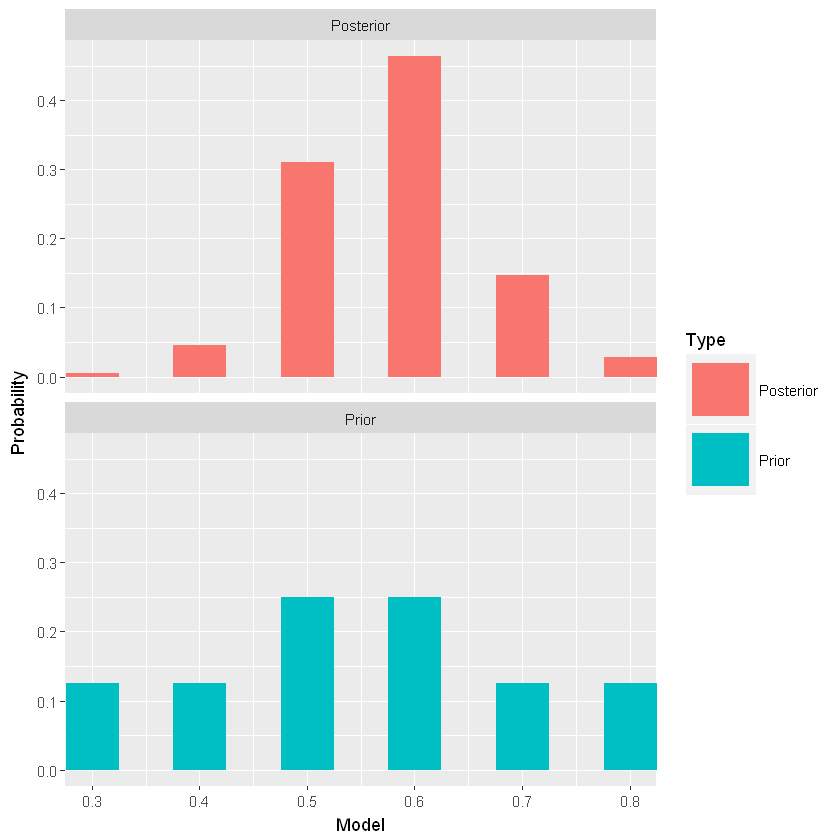

In [19]:
#Compare Prior and Posterior
prior_post_plot(bayes_df)

The plot indicates p is more likely for 0.5 ,0.6 and less likely for 0.3,0.4 and 0.8.
Suppose if the probability that p is larger than 0.5, then Prob(p>0.5) = 0.639(calculating the total  posterior value for 0.6,0.7 and 0.8). This indicates that half of the students prefer to eat outside on Friday or Saturday.

#### Continuous prior
Represent prior probabilities by a beta curve. It can take many different shapes and hence useful to express range of opinions.Beta curve depends on a and b, that is called as shape parameters.
Example: Have beta(7,10)curve.Need to find the chance that p is between 0.4 and 0.8

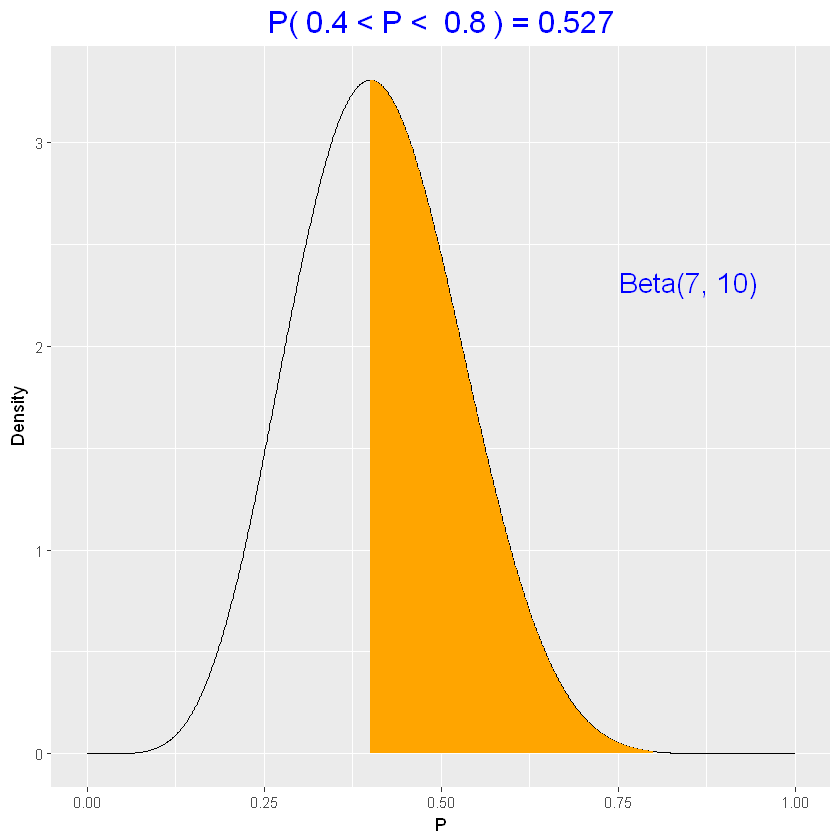

In [20]:
beta_area(0.4,0.8,c(7,10))

   A quantile is the value of the portion p such that the area or probability to the left of the value is a given number.

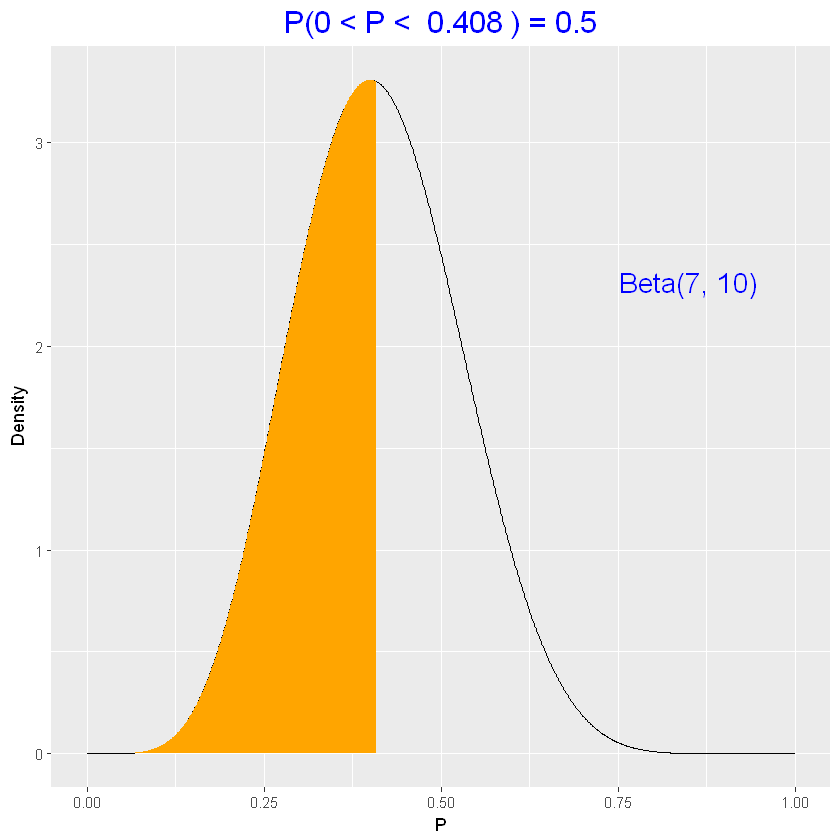

In [31]:
#Finding 0.5 quantile
beta_quantile(0.5,c(7,10))

beta_quantile computes to be 0.408.The chance that p is smaller than 0.408 is 0.5.
Want to use beta curve to represent the prior opinion about p.It is hard to pick values a and b directly.Can indirectly figure out a and b specifying two quantiles of the beta curve and find the beta curve that matches with quantiles.

In [33]:
#Specify 0.50 and 0.90 quantiles
p50 <- list(x = 0.55, p=0.5)
p90 <- list(x = 0.80, p=0.9)
beta.select(p50,p90)

[1] 3.06 2.56

These values correspond to a anb b shape parameters. To make sure this prior is reasonable, need to compute several probabilities and quantiles for beta curve.